#### Author : Maximiliano Lopez Salgado
#### First commit: 2023-05-10
#### Last commit: 2023-05-10
#### Description: This notebook is used to perform EDA on the bike data set

In [78]:
# import ML libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import folium
from folium.plugins import HeatMap

<center><h1>Exploratory Data Analysis</center></h1>

#### Formulate some hypothesis and plot the data to check if the hypothesis are true. 
#### I.E: Hourly trend: most of the businesses have rush hours and weak hours. It should not be an exception for bike rentals as well. 
#### Daily Trend: weekdays vs weekends and registered users vs casual users.. 
#### Rain: the demand for bikes might be changed on a rainy day as compared to a sunny day. Similarly, people prefer to go out on less humid days..
#### Temperature: in warm countries, temperature generally keeps people inside. You have to check Washington DC's temperature for making any guess.. 
#### Business model: businesses often rely on registered customers more than casual users. There might be some interesting insights that can strengthen this assumption.

In [79]:
# import bike data
rentals_time_weather = pd.read_csv('/Users/maximilianolopezsalgado/data_projects/capital_bike_sharing/datasets/rentals_time_weather.csv')

# print first 5 rows
rentals_time_weather.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,...,apparent_temp,humidity,windspeed,casual_user,registered_user,count,day_period,warmness,humidity_level,windspeed_level
0,1,2011-01-01,Winter,2011,January,0,No,Sunday,No,Clear,...,3.0014,0.81,0.0,3,13,16,Dawn,Cold,High,Low
1,2,2011-01-01,Winter,2011,January,1,No,Sunday,No,Clear,...,1.9982,0.80,0.0,8,32,40,Dawn,Cold,High,Low
2,3,2011-01-01,Winter,2011,January,2,No,Sunday,No,Clear,...,1.9982,0.80,0.0,5,27,32,Dawn,Cold,High,Low
3,4,2011-01-01,Winter,2011,January,3,No,Sunday,No,Clear,...,3.0014,0.75,0.0,3,10,13,Dawn,Cold,High,Low
4,5,2011-01-01,Winter,2011,January,4,No,Sunday,No,Clear,...,3.0014,0.75,0.0,0,1,1,Dawn,Cold,High,Low


# Hypothesis (12)

## Hypothesis 1

#### If the value of the the season column is equal to summer, then the number of bike rentals will be higher than the other seasons.

In [80]:
# create a pivot table to check the number of bike rentals in each season and order it in descending order
rentals_per_season = rentals_time_weather.pivot_table(index='season', values='count', aggfunc='sum').sort_values(by='count', ascending=False)
rentals_per_season

,count
season,
Summer,1061129
Spring,918589
Fall,841613
Winter,471348


In [92]:
# create a new df for rental_per_season df to check the number of bike rentals in each season using groupby function
rentals_per_season_df = rentals_time_weather.groupby('season').sum().sort_values(by='count', ascending=False)
rentals_per_season_df

/var/folders/zh/sct9634x6kvcb6_5gkff84nh0000gn/T/ipykernel_65271/828509864.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rentals_per_season_df = rentals_time_weather.groupby('season').sum().sort_values(by='count', ascending=False)


,instant,year,hour,temp,apparent_temp,humidity,windspeed,casual_user,registered_user,count
season,,,,,,,,,,
Summer,42831544,9043712,51738,113304.94,122723.8588,2846.72,51689.2270,226091,835038,1061129
Spring,32131590,8868705,50757,77594.74,80932.0390,2764.54,60088.0053,203522,715067,918589
Fall,49327258,8512650,48763,50307.84,48408.5386,2823.27,48434.5948,129782,711831,841613
Winter,26733118,8532836,49413,25706.06,15592.2666,2466.08,61136.4950,60622,410726,471348


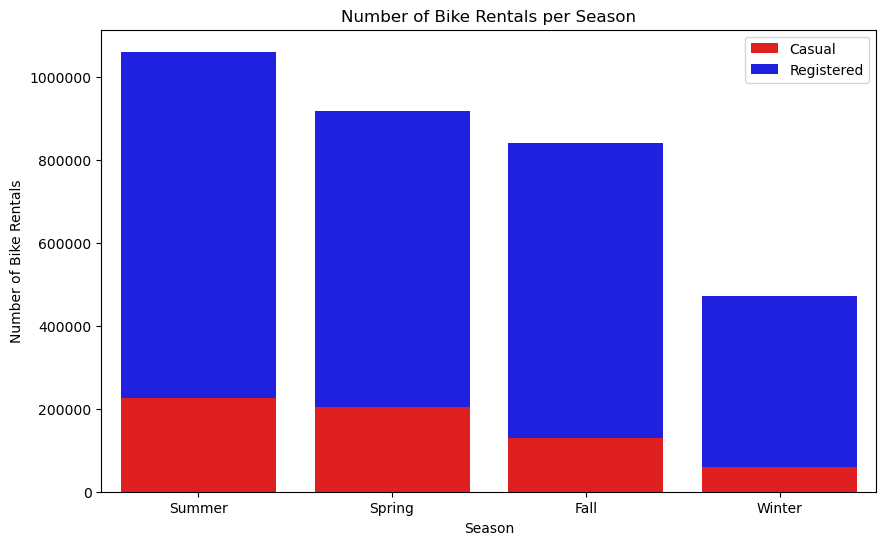

In [120]:
# Create a bar plot for the casual users
plt.figure(figsize=(10, 6))
sns.barplot(x=rentals_per_season_df.index, y=rentals_per_season_df['casual_user'], color='red', label='Casual')

# Create a bar plot for the registered users on top of the casual users
sns.barplot(x=rentals_per_season_df.index, y=rentals_per_season_df['registered_user'], color='blue', bottom=rentals_per_season_df['casual_user'], label='Registered')

# Adjust the y-axis tick labels to display the actual numbers without scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.title('Number of Bike Rentals per Season')
plt.xlabel('Season')
plt.ylabel('Number of Bike Rentals')
plt.legend()

plt.show()

#### Conclusion 1: Hypothesis 1 is true, the number of bike rentals is higher during the summer season

## Hypothesis 2

#### If the value of the the weather column is equal to clean, then the number of bike rentals will be higher than the other seasons


In [81]:
# Create a pivot table to check the number of bike rentals in each weather and order it in descending order
rentals_per_weather = pd.pivot_table(rentals_time_weather, index='weather', values='count', aggfunc='sum').sort_values(by='count', ascending=False)
rentals_per_weather

,count
weather,
Clear,2338173
Mist-Cloudy,795952
Light-Rain,158331
Heavy-Rain,223


In [97]:
# create a new df for rental_per_weather df to check the number of bike rentals in each weather using groupby function
rentals_per_weather_df = rentals_time_weather.groupby('weather').sum().sort_values(by='count', ascending=False)
rentals_per_weather_df

/var/folders/zh/sct9634x6kvcb6_5gkff84nh0000gn/T/ipykernel_65271/3794157298.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rentals_per_weather_df = rentals_time_weather.groupby('weather').sum().sort_values(by='count', ascending=False)


,instant,year,hour,temp,apparent_temp,humidity,windspeed,casual_user,registered_user,count
weather,,,,,,,,,,
Clear,99256016,22957311,133894,182831.02,185273.0564,6548.17,145710.4476,462745,1875428,2338173
Mist-Cloudy,40117179,9140310,49799,64974.36,64229.3416,3175.38,54792.5531,134481,661471,795952
Light-Rain,11631750,2854247,16943,19105.88,18165.2988,1174.41,20804.3174,22783,135548,158331
Heavy-Rain,18565,6035,35,2.32,-10.9938,2.65,41.0040,8,215,223


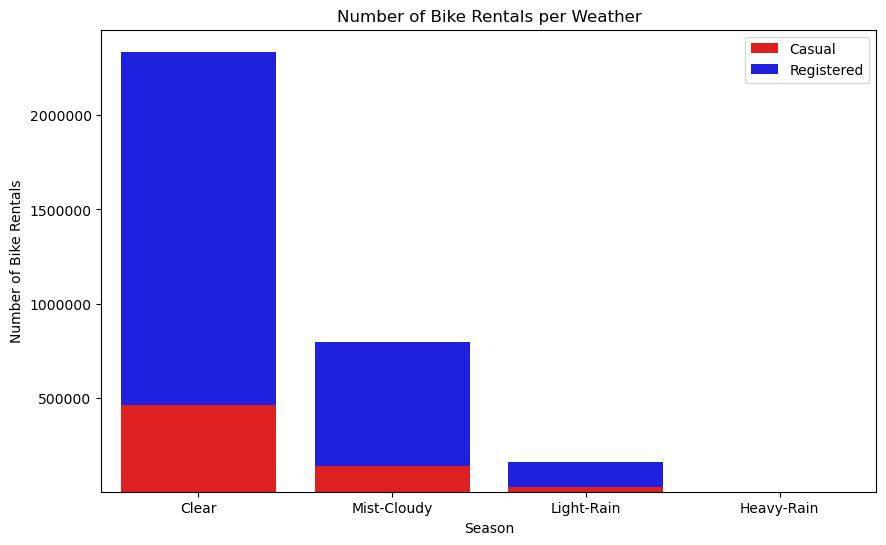

In [121]:
# Create a bar plot for the casual users
plt.figure(figsize=(10, 6))
sns.barplot(x=rentals_per_weather_df.index, y=rentals_per_weather_df['casual_user'], color='red', label='Casual')

# Create a bar plot for the registered users on top of the casual users
sns.barplot(x=rentals_per_weather_df.index, y=rentals_per_weather_df['registered_user'], color='blue', bottom=rentals_per_weather_df['casual_user'], label='Registered')

# Adjust the y-axis tick labels to display the actual numbers without scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.title('Number of Bike Rentals per Weather')
plt.xlabel('Weather')
plt.ylabel('Number of Bike Rentals')
plt.legend()

plt.show()

#### Conclusion 1: Hypothesis 2 is true, the number of bike rentals is higher when the weather is clear

## Hypothesis 3

#### If the value of the the temperature column is equal to hot, then the number of bike rentals will be higher than the other seasons


In [82]:
# Create a pivot table to check the number of bike rentals in each warmness and order it in descending orde
rentals_per_warmness = pd.pivot_table(rentals_time_weather, index='warmness', values='count', aggfunc='sum').sort_values(by='count', ascending=False)
rentals_per_warmness

,count
warmness,
Hot,1224500
Cold,832128
Warm,687711
Very Hot,548340


In [111]:
# create a new df for rental_per_warmness df to check the number of bike rentals in each warmness situation using groupby function
rentals_per_warmness_df = rentals_time_weather.groupby('warmness').sum().sort_values(by='count', ascending=False)
rentals_per_warmness_df

/var/folders/zh/sct9634x6kvcb6_5gkff84nh0000gn/T/ipykernel_65271/2846381097.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rentals_per_warmness_df = rentals_time_weather.groupby('warmness').sum().sort_values(by='count', ascending=False)


,instant,year,hour,temp,apparent_temp,humidity,windspeed,casual_user,registered_user,count
warmness,,,,,,,,,,
Hot,45123752,9942930,58623,113698.56,122654.3320,3177.18,58891.4054,264134,960366,1224500
Cold,56791802,14078406,76540,42849.94,26566.1568,4337.21,91509.4576,93213,738915,832128
Warm,32865081,7356082,40695,57489.08,59131.7460,2440.11,47628.2029,128175,559536,687711
Very Hot,16242875,3580485,24813,52876.00,59304.4682,946.11,23319.2562,134495,413845,548340


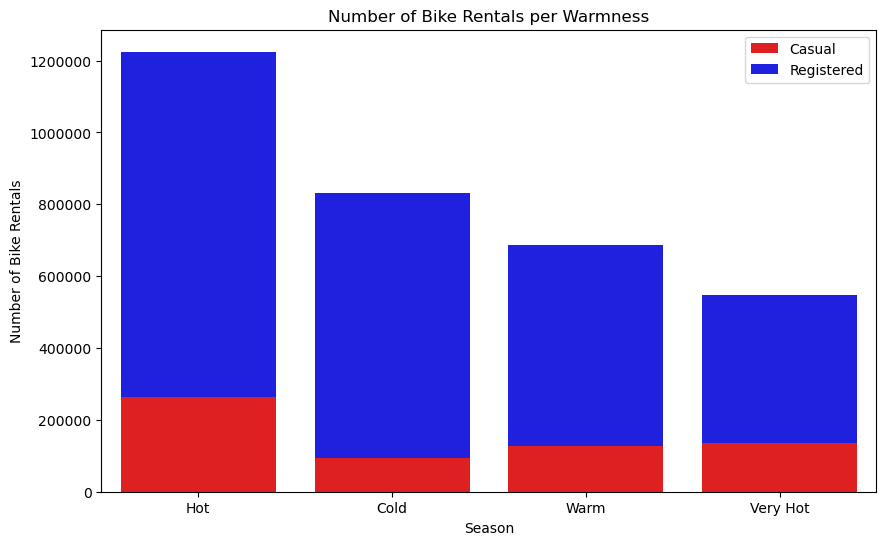

In [122]:
# Create a bar plot for the casual users
plt.figure(figsize=(10, 6))
sns.barplot(x=rentals_per_warmness_df.index, y=rentals_per_warmness_df['casual_user'], color='red', label='Casual')

# Create a bar plot for the registered users on top of the casual users
sns.barplot(x=rentals_per_warmness_df.index, y=rentals_per_warmness_df['registered_user'], color='blue', bottom=rentals_per_warmness_df['casual_user'], label='Registered')

# Adjust the y-axis tick labels to display the actual numbers without scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.title('Number of Bike Rentals per Warmness')
plt.xlabel('Warmness')
plt.ylabel('Number of Bike Rentals')
plt.legend()

plt.show()

#### Conclusion 1: Hypothesis 3 is true, the number of bike rentals is higher when the temperature is hot. Surprisingly cold weather is in the position number 2. 

## Hypothesis 4

#### If the value of the the working day column is equal to yes, then the number of bike rentals by registered members will be higher than the non registered members and vice versa

In [83]:
# use the columns casual and registered to create a pivot table to check the number of bike rentals for each type of customer on workingdays and order it in descending order
rentals_per_users = pd.pivot_table(rentals_time_weather, index='workingday', values=['casual_user', 'registered_user'], aggfunc='sum')
rentals_per_users

,casual_user,registered_user
workingday,,
No,316732,683537
Yes,303285,1989125


In [115]:
# create a new df for rentals_per_users df to check the number of bike rentals in each workingday using groupby function
rentals_per_users_df = rentals_time_weather.groupby('workingday').sum().sort_values(by='count', ascending=False)
rentals_per_users_df

/var/folders/zh/sct9634x6kvcb6_5gkff84nh0000gn/T/ipykernel_65271/3270852780.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rentals_per_users_df = rentals_time_weather.groupby('workingday').sum().sort_values(by='count', ascending=False)


,instant,year,hour,temp,apparent_temp,humidity,windspeed,casual_user,registered_user,count
workingday,,,,,,,,,,
Yes,102968250,23866469,137130,186281.94,187749.7818,7466.55,150334.7541,303285,1989125,2292410
No,48055260,11091434,63541,80631.64,79906.9212,3434.06,71013.5680,316732,683537,1000269


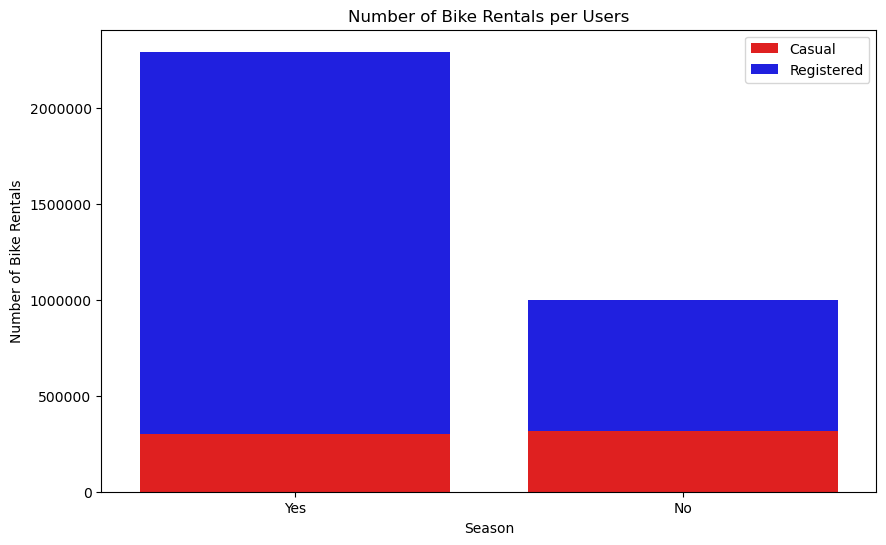

In [123]:
# Create a bar plot for the casual users
plt.figure(figsize=(10, 6))
sns.barplot(x=rentals_per_users_df.index, y=rentals_per_users_df['casual_user'], color='red', label='Casual')

# Create a bar plot for the registered users on top of the casual users
sns.barplot(x=rentals_per_users_df.index, y=rentals_per_users_df['registered_user'], color='blue', bottom=rentals_per_users_df['casual_user'], label='Registered')

# Adjust the y-axis tick labels to display the actual numbers without scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.title('Number of Bike Rentals per Users')
plt.xlabel('Weakday')
plt.ylabel('Number of Bike Rentals')
plt.legend()

plt.show()

#### Conclusion 1: Hypothesis 4 is true, registered customers rent more bikes than casual customers either in working days or not. Also casual users rent more bikes during weekdays

## Hypothesis 5

### If the value of the the day period column is equal to night, then the number of bike rentals will be higher than the other periods

In [84]:
# Create a pivot table to check the number of bike rentals in each day period
rentals_per_dayperiod = pd.pivot_table(rentals_time_weather, index='day_period', values='count', aggfunc='sum').sort_values(by='count', ascending=False)
rentals_per_dayperiod

,count
day_period,
Afternoon,1418100
Morning,1036601
Night,676337
Dawn,161641


In [125]:
# create a new df for rentals_per_users df to check the number of bike rentals in each workingday using groupby function
rentals_per_dayperiod_df = rentals_time_weather.groupby('day_period').sum().sort_values(by='count', ascending=False)
rentals_per_dayperiod_df

/var/folders/zh/sct9634x6kvcb6_5gkff84nh0000gn/T/ipykernel_65271/317985667.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rentals_per_dayperiod_df = rentals_time_weather.groupby('day_period').sum().sort_values(by='count', ascending=False)


,instant,year,hour,temp,apparent_temp,humidity,windspeed,casual_user,registered_user,count
day_period,,,,,,,,,,
Afternoon,37905945,8800315,67812,79778.70,82302.4448,2220.95,67644.9822,314958,1103142,1418100
Morning,37786900,8776177,41451,65382.72,65202.2072,2777.30,56377.2907,173049,863552,1036601
Night,31583860,7321865,76440,55996.06,56489.2388,2280.00,45151.1325,109718,566619,676337
Dawn,43746805,10059546,14968,65756.10,63662.8122,3622.36,52174.9167,22292,139349,161641


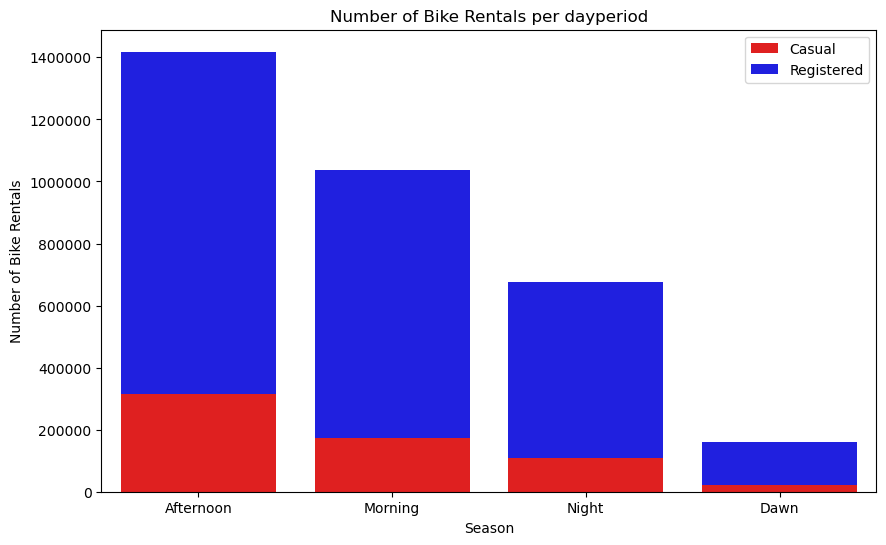

In [128]:
# Create a bar plot for the casual users
plt.figure(figsize=(10, 6))
sns.barplot(x=rentals_per_dayperiod_df.index, y=rentals_per_dayperiod_df['casual_user'], color='red', label='Casual')

# Create a bar plot for the registered users on top of the casual users
sns.barplot(x=rentals_per_dayperiod_df.index, y=rentals_per_dayperiod_df['registered_user'], color='blue', bottom=rentals_per_dayperiod_df['casual_user'], label='Registered')

# Adjust the y-axis tick labels to display the actual numbers without scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.title('Number of Bike Rentals per day period')
plt.xlabel('Day Period')
plt.ylabel('Number of Bike Rentals')
plt.legend()

plt.show()

#### Conclusion 1: Hypothesis 5 is false, the number of bike rentals is higher in the afternoon

## Hypothesis 6

#### If the value of the the weekday column is equal to monday, tuesday, wednesday, thursday and/or friday, then the number of bike rentals will be higher than the other days

In [85]:
# Create a pivot table to check the number of bike rentals in each weekday
rentals_per_weekday = pd.pivot_table(rentals_time_weather, index='weekday', values='count', aggfunc='sum').sort_values(by='count', ascending=False)
rentals_per_weekday

,count
weekday,
Saturday,487790
Friday,485395
Sunday,477807
Thursday,473048
Wednesday,469109
Tuesday,455503
Monday,444027


In [130]:
# create a new df for rental_per_day df to check the number of bike rentals in each day using groupby function
rentals_per_day_df = rentals_time_weather.groupby('weekday').sum().sort_values(by='count', ascending=False)
rentals_per_day_df

/var/folders/zh/sct9634x6kvcb6_5gkff84nh0000gn/T/ipykernel_65271/1346030635.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rentals_per_day_df = rentals_time_weather.groupby('weekday').sum().sort_values(by='count', ascending=False)


,instant,year,hour,temp,apparent_temp,humidity,windspeed,casual_user,registered_user,count
weekday,,,,,,,,,,
Saturday,21700913,5002605,28670,38131.14,37654.8024,1526.62,31064.6974,78238,409552,487790
Friday,21595502,4970427,28555,39115.48,39564.1882,1506.39,31784.8268,61460,423935,485395
Sunday,21734326,5052880,28847,36792.80,36388.8164,1555.14,33019.5832,153852,323955,477807
Thursday,21541366,4978471,28530,39138.94,39384.2856,1595.93,31037.8304,57319,415729,473048
Wednesday,21257281,4934214,28509,39009.44,39625.3858,1569.51,31541.8044,57843,411266,469109
Tuesday,21432775,4986513,28649,37847.34,38201.1830,1575.78,31368.8171,70784,384719,455503
Monday,21761347,5032793,28911,36878.44,36838.0416,1571.24,31530.7628,140521,303506,444027


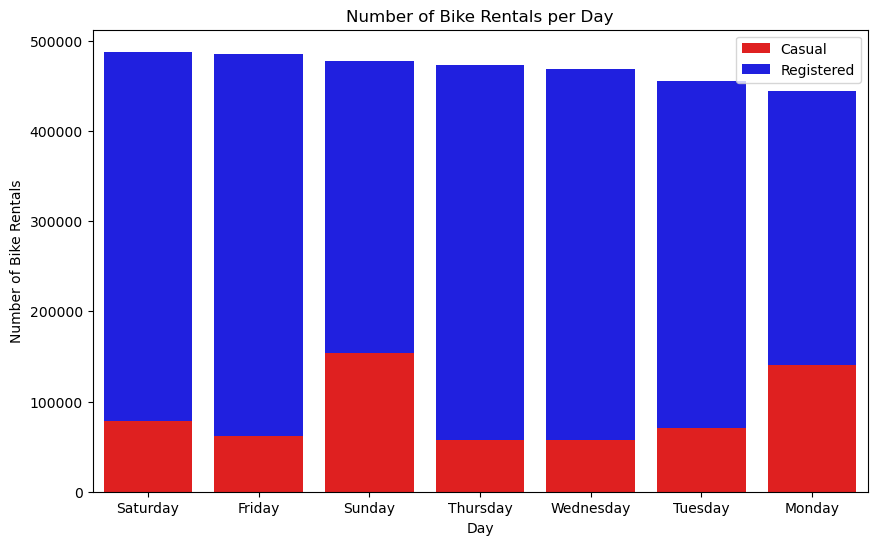

In [137]:
# Create a bar plot for the casual users
plt.figure(figsize=(10, 6))
sns.barplot(x=rentals_per_day_df.index, y=rentals_per_day_df['casual_user'], color='red', label='Casual')

# Create a bar plot for the registered users on top of the casual users
sns.barplot(x=rentals_per_day_df.index, y=rentals_per_day_df['registered_user'], color='blue', bottom=rentals_per_day_df['casual_user'], label='Registered')

# Adjust the y-axis tick labels to display the actual numbers without scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.title('Number of Bike Rentals per Day')
plt.xlabel('Day')
plt.ylabel('Number of Bike Rentals')
plt.legend()

plt.show()

#### Conclusion 1: Hypothesis 6 is not true, the number of bike rentals is higher in saturday and friday, but on sunday the number of bike rentals is bigger than the number of bike rentals in wednesday, tuesday and monday

#### Conclusion 2: The number of casual rentals are bigger on sunday and monday, and the number of registered rentals are bigger on tuesday, wednesday, thursday and friday. The number of rentals are bigger on workingdays than on non-workingdays. The number of rentals are bigger in the afternoon than in the morning and evening. The number of rentals are bigger in the summer and fall than in the spring and winter. The number of rentals are bigger on friday, thursday and wednesday.

## Hypothesis 7

#### Hypothesis 7: if the value of the the month column is equal to june, july and/or august, then the number of bike rentals will be higher than the other months

In [86]:
# Create a pivot table to check the number of bike rentals in each month
rentals_per_month = pd.pivot_table(rentals_time_weather, index='month', values='count', aggfunc='sum').sort_values(by='count', ascending=False)
rentals_per_month

,count
month,
August,351194
June,346342
September,345991
July,344948
May,331686
October,322352
April,269094
November,254831
March,228920


In [134]:
# create a new df for rental_per_month df to check the number of bike rentals in each day using groupby function
rentals_per_month_df = rentals_time_weather.groupby('month').sum().sort_values(by='count', ascending=False)
rentals_per_month_df

/var/folders/zh/sct9634x6kvcb6_5gkff84nh0000gn/T/ipykernel_65271/3512911450.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rentals_per_month_df = rentals_time_weather.groupby('month').sum().sort_values(by='count', ascending=False)


,instant,year,hour,temp,apparent_temp,humidity,windspeed,casual_user,registered_user,count
month,,,,,,,,,,
August,14423068,2966969,16968,37330.98,39828.9964,939.91,16945.3720,72039,279155,351194
June,11904480,2896560,16560,34779.70,37618.8708,829.16,17889.3149,73906,272436,346342
September,15055308,2890527,16554,30142.24,31954.1880,1026.67,15968.4718,70323,275668,345991
July,13390512,2993112,17112,40930.58,45339.6522,889.64,16555.4052,78157,266791,344948
May,11212080,2993112,17112,29693.82,31744.5300,1025.17,18243.2558,75285,256401,331686
October,16083176,2918669,16755,21616.30,22168.7152,1000.45,16713.4649,59760,262592,322352
April,9772612,2890525,16550,20248.74,20361.1890,845.12,22560.4075,60802,208292,269094
November,17112818,2890525,16552,13439.38,11847.1626,898.19,17692.5962,36603,218228,254831
March,9007175,2962946,17060,15278.60,13598.3556,867.67,21960.4091,44444,184476,228920


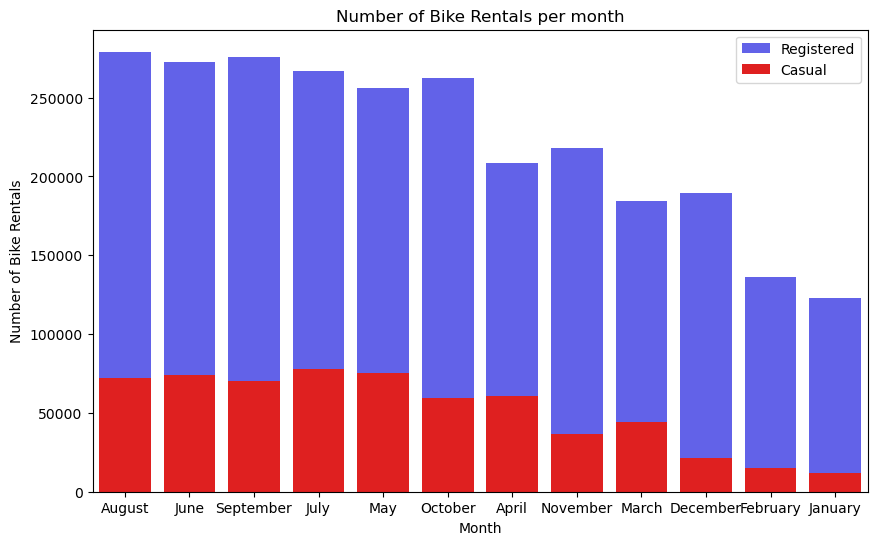

In [136]:
# create a bar plot that shows the number of bike rentals per month and the type of user
plt.figure(figsize=(10, 6))
sns.barplot(x=rentals_per_month_df.index, y=rentals_per_month_df['registered_user'], color='blue', label='Registered', alpha=0.7)   # we need to call this first to get the casual users on top of the registered users in the graph
sns.barplot(x=rentals_per_month_df.index, y=rentals_per_month_df['casual_user'], color='red', label='Casual')
plt.title('Number of Bike Rentals per month')
plt.xlabel('Month')
plt.ylabel('Number of Bike Rentals')
plt.legend()

# Adjust the y-axis tick labels to display the actual numbers without scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.show()

#### Conclusion 1: Hypothesis 7 is not true, because despite that the number of bike rentals in august and june are the top 2 on the records, the 3rd month with the highest number of bike rentals is september, which is not a summer month

## Hypothesis 8

#### If the value of the the hour column is equal to 8, 17 and/or 18, then the number of bike rentals will be higher than the other hours

In [87]:
# Create a pivot table to check the number of bike rentals in each hour
rentals_per_hour = pd.pivot_table(rentals_time_weather, index='hour', values='count', aggfunc='sum').sort_values(by='count', ascending=False)
rentals_per_hour

,count
hour,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149
14,175652


In [138]:
# create a new df for rental_per_hour df to check the number of bike rentals in each hour using groupby function
rentals_per_hour_df = rentals_time_weather.groupby('hour').sum().sort_values(by='count', ascending=False)
rentals_per_hour_df

/var/folders/zh/sct9634x6kvcb6_5gkff84nh0000gn/T/ipykernel_65271/406028458.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rentals_per_hour_df = rentals_time_weather.groupby('hour').sum().sort_values(by='count', ascending=False)


,instant,year,temp,apparent_temp,humidity,windspeed,casual_user,registered_user,count
hour,,,,,,,,,
17,6320083,1468395,13187.48,13528.9442,374.81,11414.1803,54220,282640,336860
18,6314588,1464373,12693.06,12987.9454,390.20,10959.1632,44496,265276,309772
8,6296660,1462361,9730.66,9493.1216,510.85,8600.1937,15761,245240,261001
16,6319353,1468395,13543.74,13973.9030,361.93,11607.1738,53834,173914,227748
19,6315316,1464373,12111.20,12349.9894,416.74,10250.1625,35505,191284,226789
13,6316578,1466384,13174.80,13619.8674,372.95,10825.2168,52713,132206,184919
12,6299965,1464372,12662.04,12995.9842,390.72,10536.2391,49718,134696,184414
15,6318036,1466384,13650.44,14153.8668,358.76,11485.0864,54606,128543,183149
14,6317307,1466384,13529.18,14037.9180,362.30,11354.1617,55089,120563,175652


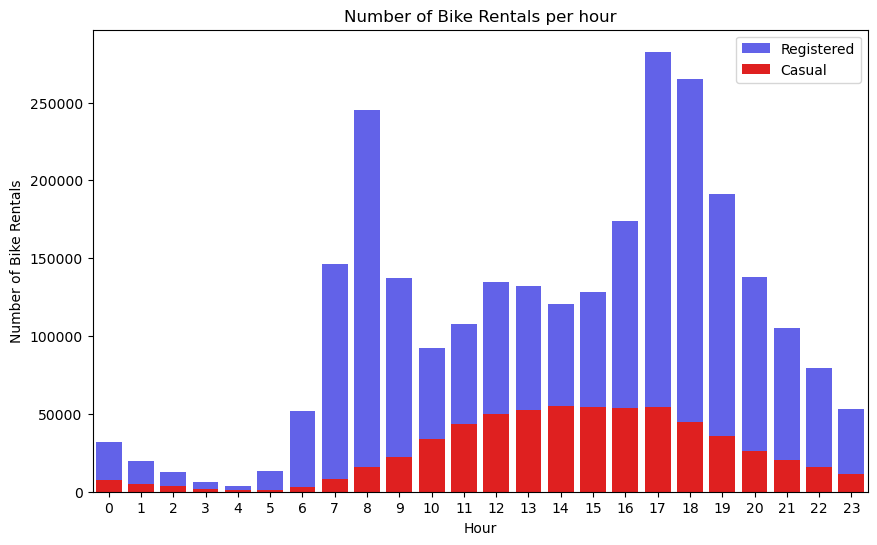

In [140]:
# create a bar plot that shows the number of bike rentals per weather and the type of user
plt.figure(figsize=(10, 6))
sns.barplot(x=rentals_per_hour_df.index, y=rentals_per_hour_df['registered_user'], color='blue', label='Registered', alpha=0.7)   # we need to call this first to get the casual users on top of the registered users in the graph
sns.barplot(x=rentals_per_hour_df.index, y=rentals_per_hour_df['casual_user'], color='red', label='Casual')
plt.title('Number of Bike Rentals per hour')
plt.xlabel('Hour')
plt.ylabel('Number of Bike Rentals')
plt.legend()

# Adjust the y-axis tick labels to display the actual numbers without scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.show()

#### Conclusion 1: Hypothesis 8 is not true, because the number of bike rentals is higher in the hour 17 and 18, but not in the hour 8

#### Conclusion 2: Considering the number of bike rentals by casual users, the hours with most rentals are 14:00, 15:00, 16:00 and 17:00.

## Hypothesis 9

#### If the value of the holiday column is equal to yes, then the number of bike rentals will be higher than when its not holiday time

In [143]:
# create a pivot table to check the number of bike rentals in each holiday situation for the casual and registered users
rentals_per_holiday = pd.pivot_table(rentals_time_weather, index='holiday', values='count', aggfunc='sum').sort_values(by='count', ascending=False)
rentals_per_holiday

,count
holiday,
No,3214244
Yes,78435


In [144]:
# create a new df for rental_per_holiday df to check the number of bike rentals in each day using groupby function
rentals_per_holiday_df = rentals_time_weather.groupby('holiday').sum().sort_values(by='count', ascending=False)
rentals_per_holiday_df

/var/folders/zh/sct9634x6kvcb6_5gkff84nh0000gn/T/ipykernel_65271/508101751.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rentals_per_holiday_df = rentals_time_weather.groupby('holiday').sum().sort_values(by='count', ascending=False)


,instant,year,hour,temp,apparent_temp,humidity,windspeed,casual_user,registered_user,count
holiday,,,,,,,,,,
No,146463923,33952142,194888,259953.18,260976.6398,10592.93,214885.1001,597658,2616586,3214244
Yes,4559587,1005761,5783,6960.40,6680.0632,307.68,6463.2220,22359,56076,78435


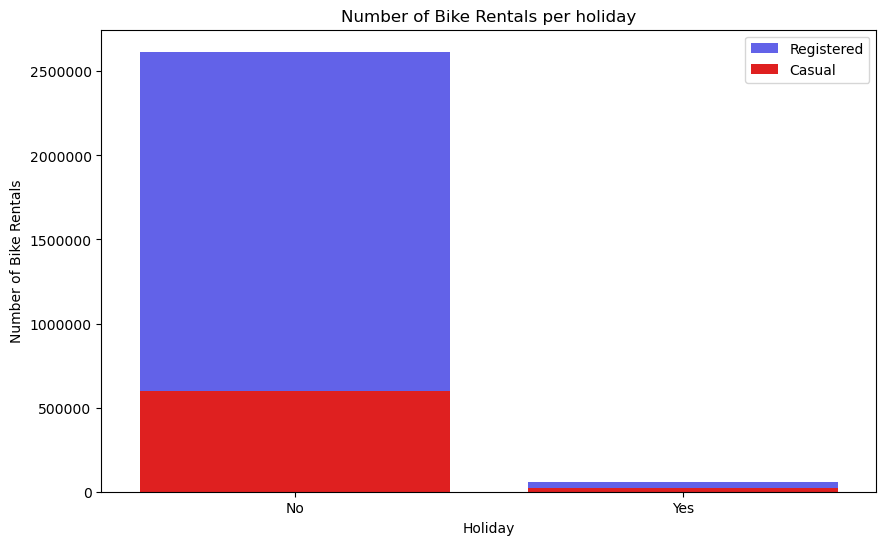

In [145]:
# create a bar plot that shows the number of bike rentals per weather and the type of user
plt.figure(figsize=(10, 6))
sns.barplot(x=rentals_per_holiday_df.index, y=rentals_per_holiday_df['registered_user'], color='blue', label='Registered', alpha=0.7)   # we need to call this first to get the casual users on top of the registered users in the graph
sns.barplot(x=rentals_per_holiday_df.index, y=rentals_per_holiday_df['casual_user'], color='red', label='Casual')
plt.title('Number of Bike Rentals per holiday')
plt.xlabel('Holiday')
plt.ylabel('Number of Bike Rentals')
plt.legend()

# Adjust the y-axis tick labels to display the actual numbers without scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.show()

#### Conclusion 1: Hypothesis 9 is false, because the number of bike rentals is higher in the non-holiday days

## Hypothesis 10

#### If the values of the year column is equal to 2011, then the number of bike rentals will be higher than in 2012 create a pivot table to check the number of bike rentals in each holiday

In [147]:
# create a pivot table to check the number of bike rentals in years 2011 and 2012  for the casual and registered users
rentals_per_year = pd.pivot_table(rentals_time_weather, index='year', values='count', aggfunc='sum').sort_values(by='count', ascending=False)
rentals_per_year

,count
year,
2012,2049576
2011,1243103


In [148]:
# create a new df for rental_per_year df to check the number of bike rentals in each year using groupby function
rentals_per_year_df = rentals_time_weather.groupby('year').sum().sort_values(by='count', ascending=False)
rentals_per_year_df

/var/folders/zh/sct9634x6kvcb6_5gkff84nh0000gn/T/ipykernel_65271/3673354019.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rentals_per_year_df = rentals_time_weather.groupby('year').sum().sort_values(by='count', ascending=False)


,instant,hour,temp,apparent_temp,humidity,windspeed,casual_user,registered_user,count
year,,,,,,,,,
2012,113651175,100617,137357.58,138379.1156,5338.16,110618.4807,372765,1676811,2049576
2011,37372335,100054,129556.00,129277.5874,5562.45,110729.8414,247252,995851,1243103


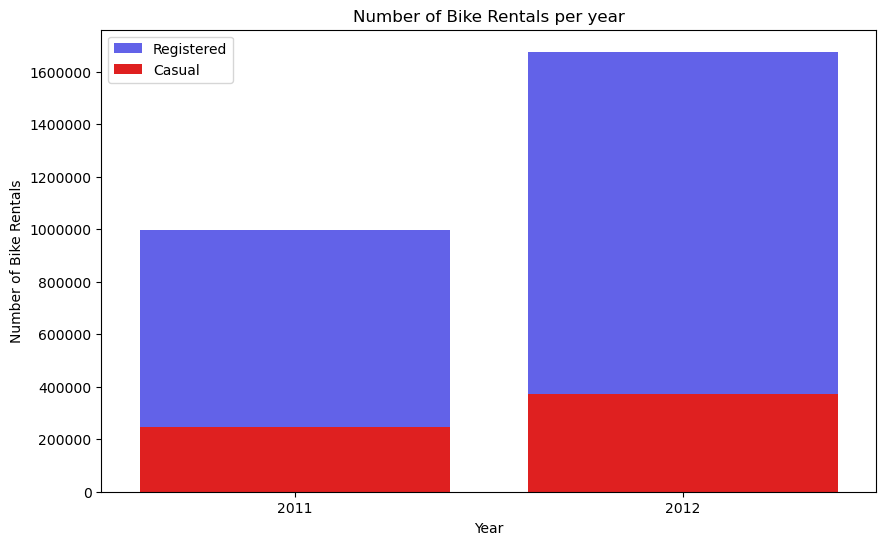

In [149]:
# create a bar plot that shows the number of bike rentals per weather and the type of user
plt.figure(figsize=(10, 6))
sns.barplot(x=rentals_per_year_df.index, y=rentals_per_year_df['registered_user'], color='blue', label='Registered', alpha=0.7)   # we need to call this first to get the casual users on top of the registered users in the graph
sns.barplot(x=rentals_per_year_df.index, y=rentals_per_year_df['casual_user'], color='red', label='Casual')
plt.title('Number of Bike Rentals per year')
plt.xlabel('Year')
plt.ylabel('Number of Bike Rentals')
plt.legend()

# Adjust the y-axis tick labels to display the actual numbers without scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.show()

#### Conclusion 1: Hypothesis 10 is not true, the number of bike rentals is higher in 2012

## Hypothesis 11 

#### If the values of the windspeed_level column is equal to strong, then the number of bike rentals will be lower than the  when the windspeed is low 

In [90]:
# create a pivot table to check the number of bike rentals in each windspeed level
rentals_per_windspeed_level = pd.pivot_table(rentals_time_weather, index='windspeed_level', values='count', aggfunc='sum').sort_values(by='count', ascending=False)
rentals_per_windspeed_level


,count
windspeed_level,
Medium,1662619
Low,1139251
High,490809


In [151]:
# create a new df for rental_per_windspeed_level df to check the number of bike rentals in each day using groupby function
rentals_per_windspeed_level_df = rentals_time_weather.groupby('windspeed_level').sum().sort_values(by='count', ascending=False)
rentals_per_windspeed_level_df

/var/folders/zh/sct9634x6kvcb6_5gkff84nh0000gn/T/ipykernel_65271/2918879488.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rentals_per_windspeed_level_df = rentals_time_weather.groupby('windspeed_level').sum().sort_values(by='count', ascending=False)


,instant,year,hour,temp,apparent_temp,humidity,windspeed,casual_user,registered_user,count
windspeed_level,,,,,,,,,,
Medium,69172412,16124223,96971,128398.10,128922.6690,4866.55,120967.1600,325465,1337154,1662619
Low,62772307,14000084,72506,105340.12,108210.2718,4771.09,35514.6833,201348,937903,1139251
High,19078791,4833596,31194,33175.36,30523.7622,1262.97,64866.4788,93204,397605,490809


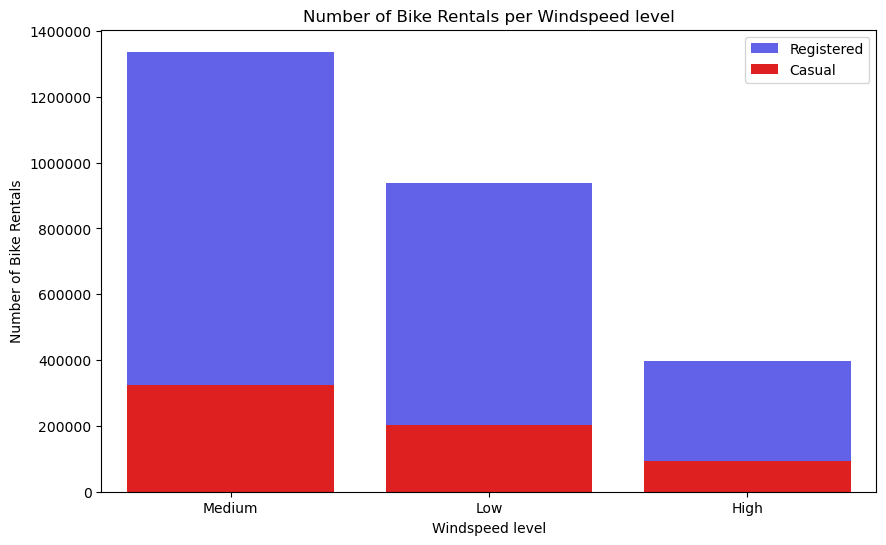

In [152]:
# create a bar plot that shows the number of bike rentals per Windspeed level and the type of user
plt.figure(figsize=(10, 6))
sns.barplot(x=rentals_per_windspeed_level_df.index, y=rentals_per_windspeed_level_df['registered_user'], color='blue', label='Registered', alpha=0.7)   # we need to call this first to get the casual users on top of the registered users in the graph
sns.barplot(x=rentals_per_windspeed_level_df.index, y=rentals_per_windspeed_level_df['casual_user'], color='red', label='Casual')
plt.title('Number of Bike Rentals per Windspeed level')
plt.xlabel('Windspeed level')
plt.ylabel('Number of Bike Rentals')
plt.legend()

# Adjust the y-axis tick labels to display the actual numbers without scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.show()

#### Hypothesis 11 is not true, since the number of bike rentals is higher when the windspeed is medium

## Hypothesis 12

#### If the values of the humidity_level column is equal to high, then the number of bike rentals will be lower than the  when the humidity is low


In [91]:
# create a pivot table to check the number of bike rentals in each humidity level
rentals_per_humidity_level = pd.pivot_table(rentals_time_weather, index='humidity_level', values='count', aggfunc='sum').sort_values(by='count', ascending=False)
rentals_per_humidity_level

,count
humidity_level,
Medium,1766342
High,818029
Low,708308


In [153]:
# create a new df for rental_per_humidity_level df to check the number of bike rentals in each day using groupby function
rentals_per_humidity_level_df = rentals_time_weather.groupby('humidity_level').sum().sort_values(by='count', ascending=False)
rentals_per_humidity_level_df

/var/folders/zh/sct9634x6kvcb6_5gkff84nh0000gn/T/ipykernel_65271/1396140781.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rentals_per_humidity_level_df = rentals_time_weather.groupby('humidity_level').sum().sort_values(by='count', ascending=False)


,instant,year,hour,temp,apparent_temp,humidity,windspeed,casual_user,registered_user,count
humidity_level,,,,,,,,,,
Medium,74517270,16979170,102153,129220.58,130360.6174,4714.56,112119.2874,342189,1424153,1766342
High,56004185,12992048,61798,95911.76,96187.6422,5375.80,67211.4855,114223,703806,818029
Low,20502055,4986685,36720,41781.24,41108.4434,810.25,42017.5492,163605,544703,708308


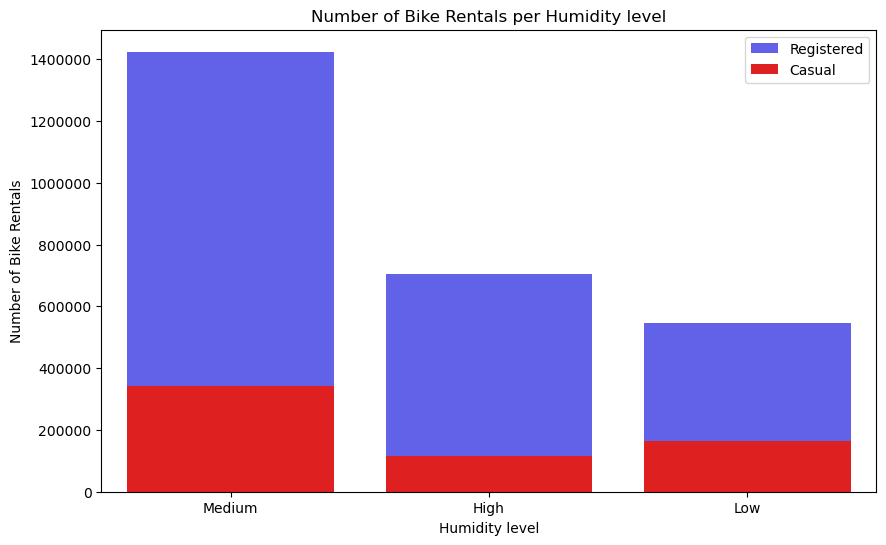

In [154]:
# create a bar plot that shows the number of bike rentals per Humidity level and the type of user
plt.figure(figsize=(10, 6))
sns.barplot(x=rentals_per_humidity_level_df.index, y=rentals_per_humidity_level_df['registered_user'], color='blue', label='Registered', alpha=0.7)   # we need to call this first to get the casual users on top of the registered users in the graph
sns.barplot(x=rentals_per_humidity_level_df.index, y=rentals_per_humidity_level_df['casual_user'], color='red', label='Casual')
plt.title('Number of Bike Rentals per Humidity level')
plt.xlabel('Humidity level')
plt.ylabel('Number of Bike Rentals')
plt.legend()

# Adjust the y-axis tick labels to display the actual numbers without scientific notation
plt.ticklabel_format(style='plain', axis='y')

plt.show()

#### Hypothesis 12 is not true, the number of bike rentals is higher when the humidity is medium

# Trip History Dataset 

In [71]:
# import start_stations_long_lat.csv
start_stations_long_lat = pd.read_csv('/Users/maximilianolopezsalgado/data_projects/capital_bike_sharing/datasets/start_stations_long_lat.csv')

# print first 5 rows
display(start_stations_long_lat.head())

# import end_stations_long_lat.csv
end_stations_long_lat = pd.read_csv('/Users/maximilianolopezsalgado/data_projects/capital_bike_sharing/datasets/end_stations_long_lat.csv')

# print first 5 rows
display(end_stations_long_lat.head())

FileNotFoundError: [Errno 2] No such file or directory: '/Users/maximilianolopezsalgado/data_projects/capital_bike_sharing/datasets/start_stations_long_lat.csv'

In [ ]:
# import trip history dataset  
trip = pd.read_csv('../datasets/trip_history.csv')

# print first 5 rows
trip.head()

,Duration,Start station,End station
0,59.133333,5th & F St NW,5th & F St NW
1,5.766667,14th & Harvard St NW,14th & V St NW
2,9.366667,Georgia & New Hampshire Ave NW,Adams Mill & Columbia Rd NW
3,7.233333,10th & U St NW,Florida Ave & R St NW
4,3.883333,Adams Mill & Columbia Rd NW,Calvert & Biltmore St NW


In [ ]:
# check data types
trip.dtypes

Duration         float64
Start station     object
End station       object
dtype: object

 ### TOP 10 START STATIONS WITH THE HIGHEST NUMBER OF TRIPS

In [ ]:
# create a table with the top 10 stations with the highest number of trips
trip_start_top10 = start_stations_long_lat['Start station'].value_counts().head(10).sort_values(ascending=False)

display(trip_start_top10)

Massachusetts Ave & Dupont Circle NW                   107162
Columbus Circle / Union Station                         77750
15th & P St NW                                          73707
17th & Corcoran St NW                                   63502
Adams Mill & Columbia Rd NW                             62378
14th & V St NW                                          58356
Eastern Market Metro / Pennsylvania Ave & 7th St SE     56029
New Hampshire Ave & T St NW                             55812
14th & Rhode Island Ave NW                              50142
20th St & Florida Ave NW                                49812
Name: Start station, dtype: int64

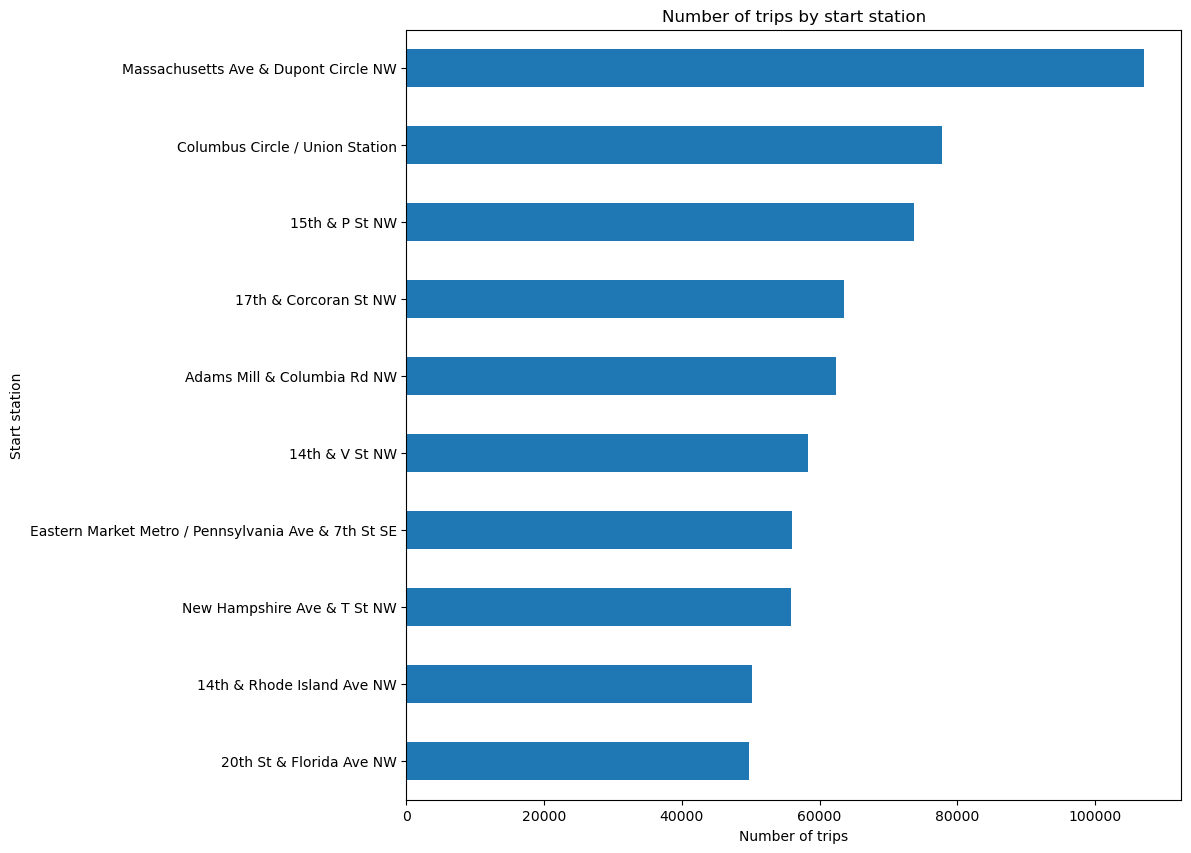

In [ ]:
# create a a plot to show the number of trips by start station in the map of washington DC limit the graphic to 15. Exchange the x and y axis to show the stations in the y axis. Order the stations by number of trips in descending order
trip_start_station = trip['Start station'].value_counts().head(10).sort_values(ascending=False).plot(kind='barh', figsize=(10, 10))
trip_start_station.set_xlabel('Number of trips')
trip_start_station.set_ylabel('Start station')
trip_start_station.set_title('Number of trips by start station')

# make the bars vertical
trip_start_station.invert_yaxis()

# show the plot
plt.show()


 ### TOP 10 END STATIONS WITH THE HIGHEST NUMBER OF TRIPS

In [ ]:
# get a table with the top 10 start stations
trip_end_station_top10 = trip['End station'].value_counts().head(10).sort_values(ascending=False)
trip_end_station_top10

Massachusetts Ave & Dupont Circle NW                   118707
15th & P St NW                                          83457
Columbus Circle / Union Station                         79681
17th & Corcoran St NW                                   67382
14th & V St NW                                          59658
New Hampshire Ave & T St NW                             57145
8th & H St NW                                           54811
21st & I St NW                                          54259
Eastern Market Metro / Pennsylvania Ave & 7th St SE     54070
Adams Mill & Columbia Rd NW                             52546
Name: End station, dtype: int64

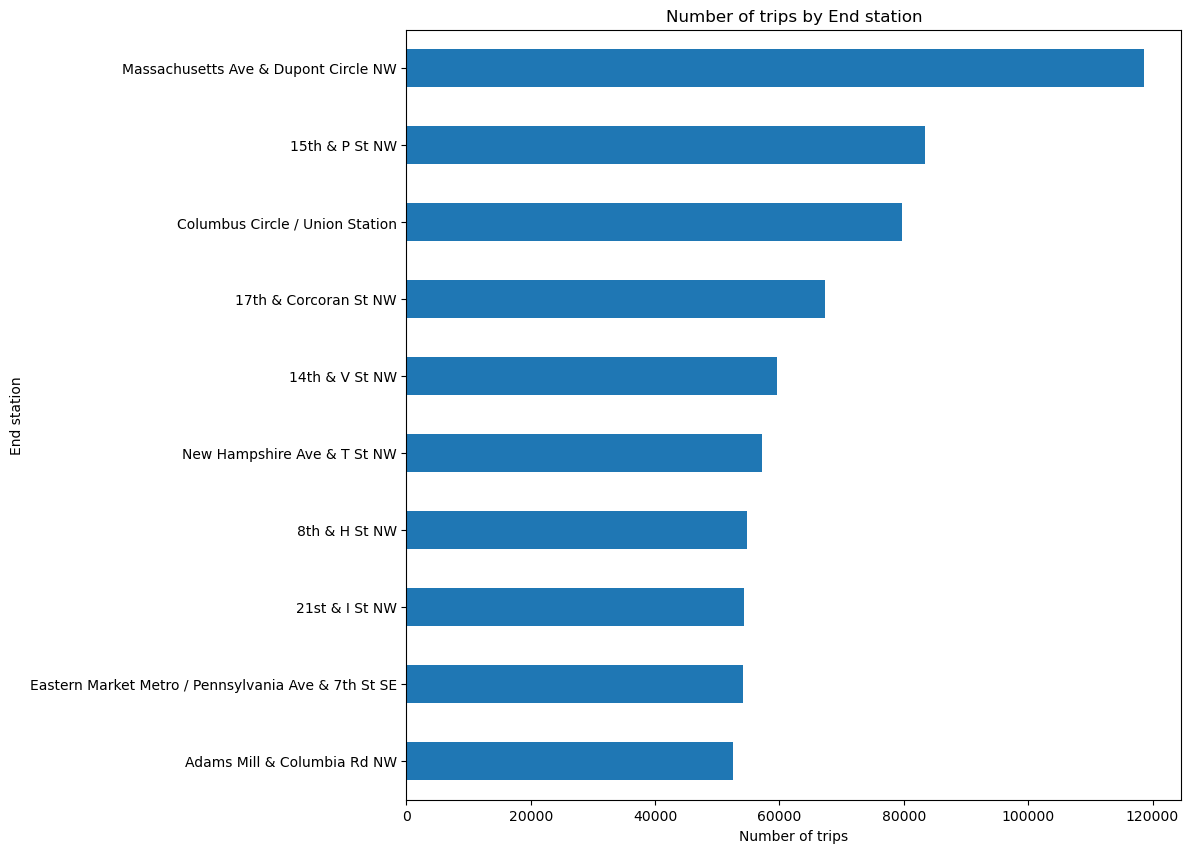

In [ ]:
# create a a plot to show the number of trips by End station in the map of washington DC limit the graphic to 15. Exchange the x and y axis to show the stations in the y axis. Order the stations by number of trips in descending order
trip_end_station_top10 = trip_end_station_top10.plot(kind='barh', figsize=(10, 10))
trip_end_station_top10.set_xlabel('Number of trips')
trip_end_station_top10.set_ylabel('End station')
trip_end_station_top10.set_title('Number of trips by End station')

# make the bars vertical
trip_end_station_top10.invert_yaxis()

# show the plot
plt.show()

## GEOGRAPHICAL ANALYSIS

### TOP 10 STATIONS WITH MORE TRIPS

In [ ]:
# import start_station_long_lat dataset with geographical information of the stations
start_stations_long_lat = pd.read_csv('/Users/maximilianolopezsalgado/data_projects/capital_bike_sharing/datasets/start_station.csv', sep=';')

# print first 5 rows
start_stations_long_lat.head()

# check data types
start_stations_long_lat.dtypes

# display the first 5 rows of the dataset
start_stations_long_lat.head()

,Start station,counts,Start station latitude,Start station longitude
0,10th & E St NW,6280,38.896136,-77.022843
1,10th & Monroe St NE,5423,38.932514,-76.992889
2,10th & U St NW,38149,38.917007,-77.024112
3,10th St & Constitution Ave NW,33682,38.891931,-77.025990
4,11th & F St NW,38,38.897206,-77.022971


In [ ]:
# create a table with the top 10 start stations by counts
trip_start_station_top10 = start_stations_long_lat['Start station'].value_counts().head(10).reset_index()
trip_start_station_top10.columns = ['Start station', 'Counts']

# display the first 5 rows of the dataset
trip_start_station_top10.head(10)



,Start station,Counts
0,10th & E St NW,1
1,Lee Hwy & N Adams St,1
2,Fairfax Village,1
3,Florida Ave & R St NW,1
4,Gallaudet / 8th St & Florida Ave NE,1
5,George Mason Dr & Wilson Blvd,1
6,Georgetown Harbor / 30th St NW,1
7,Georgia & New Hampshire Ave NW,1
8,Georgia Ave and Fairmont St NW,1
9,Glebe Rd & 11th St N,1


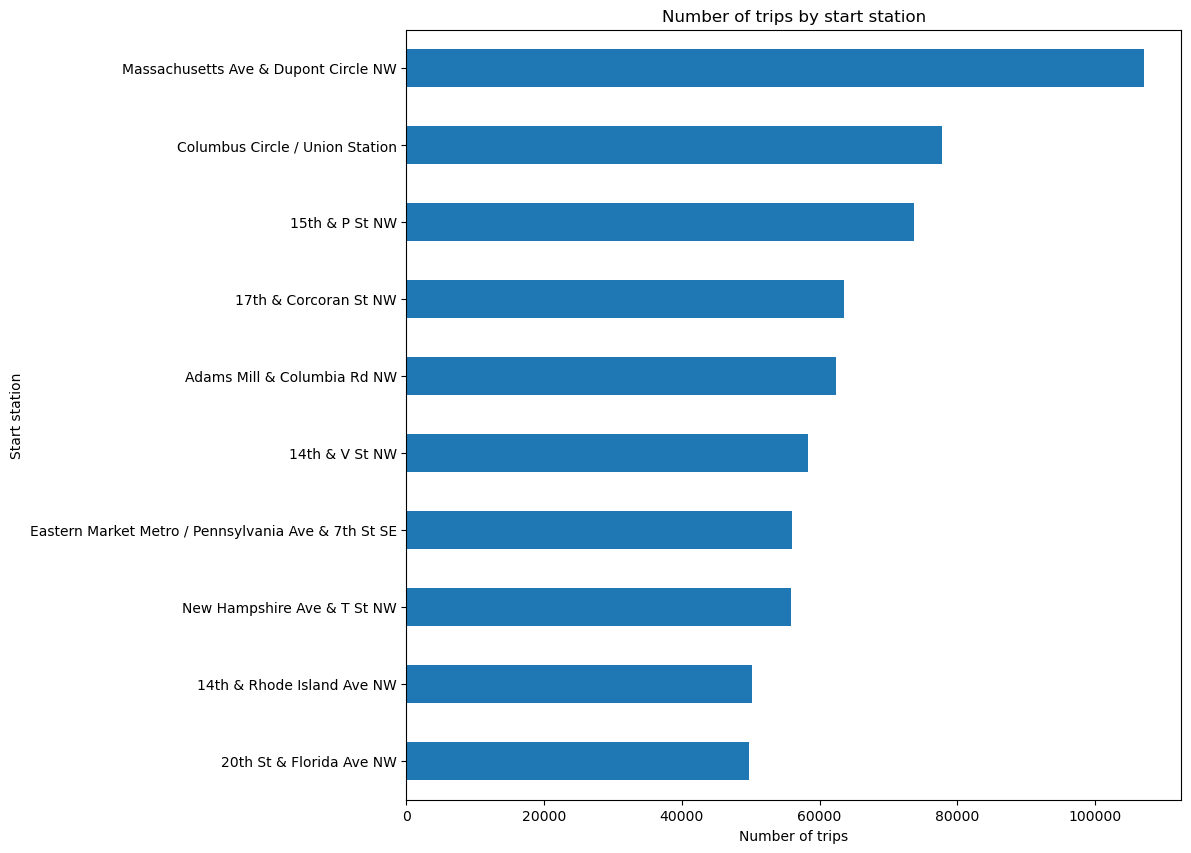

In [ ]:
# create a a plot to show the number of trips by start station in the map of washington DC limit the graphic to 10. Exchange the x and y axis to show the stations in the y axis. Order the stations by number of trips in descending order
trip_start_station = trip['Start station'].value_counts().head(10).sort_values(ascending=False).plot(kind='barh', figsize=(10, 10))
trip_start_station.set_xlabel('Number of trips')
trip_start_station.set_ylabel('Start station')
trip_start_station.set_title('Number of trips by start station')

# make the bars vertical
trip_start_station.invert_yaxis()

# show the plot
plt.show()

### MAP OF WASHINGTON DC WITH THE TOP 10 END STATIONS

### TOP 10 END STATIONS BY NUMBER OF TRIPS

In [ ]:
# create a table with the top 10 end stations by counts
trip_end_station_top10 = trip['End station'].value_counts().head(10).reset_index()
trip_end_station_top10.columns = ['End station', 'Counts']

# display the first 5 rows of the dataset
trip_end_station_top10.head(10)

,End station,Counts
0,Massachusetts Ave & Dupont Circle NW,118707
1,15th & P St NW,83457
2,Columbus Circle / Union Station,79681
3,17th & Corcoran St NW,67382
4,14th & V St NW,59658
5,New Hampshire Ave & T St NW,57145
6,8th & H St NW,54811
7,21st & I St NW,54259
8,Eastern Market Metro / Pennsylvania Ave & 7th ...,54070
9,Adams Mill & Columbia Rd NW,52546


In [ ]:
end_stations_long_lat = pd.read_csv('/Users/maximilianolopezsalgado/data_projects/capital_bike_sharing/datasets/end_stations_long_lat.csv', sep=',')

# print first 5 rows
end_stations_long_lat.head()

# check data types
end_stations_long_lat.dtypes

# display the first 5 rows of the dataset
end_stations_long_lat.head()

,Station,Count,End station latitude,End station longitude
0,Massachusetts Ave & Dupont Circle NW,118707,38.910100,-77.044400
1,15th & P St NW,83457,38.909627,-77.044409
2,Columbus Circle / Union Station,79681,38.897027,-77.004915
3,17th & Corcoran St NW,67382,38.912083,-77.038646
4,14th & V St NW,59658,38.918116,-77.035802


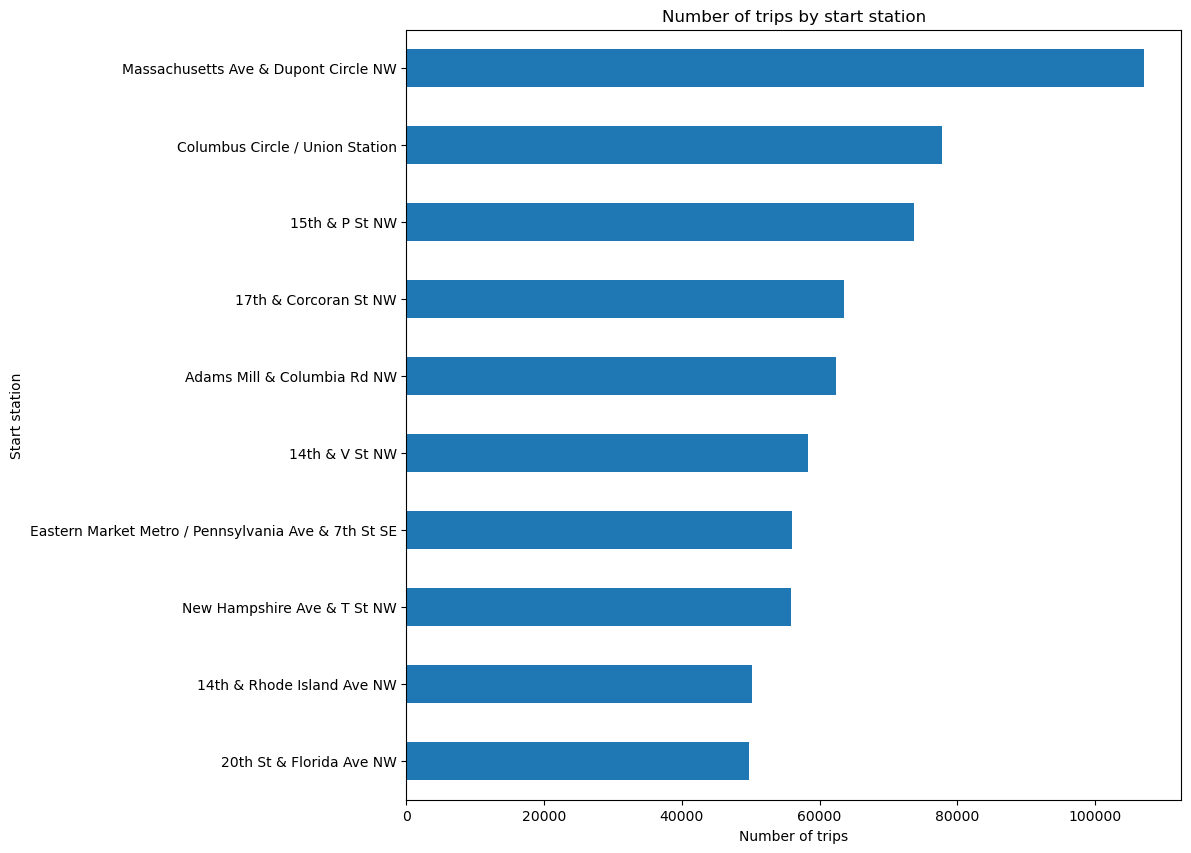

In [ ]:
# create a a plot to show the number of trips by end station in the map of washington DC limit the graphic to 10. Exchange the x and y axis to show the stations in the y axis. Order the stations by number of trips in descending order
trip_end_station = trip['Start station'].value_counts().head(10).sort_values(ascending=False).plot(kind='barh', figsize=(10, 10))
trip_end_station.set_xlabel('Number of trips')
trip_end_station.set_ylabel('Start station')
trip_end_station.set_title('Number of trips by start station')

# make the bars vertical
trip_end_station.invert_yaxis()

# show the plot
plt.show()

In [ ]:
# utilize folium library to show this 10 stations in the map of washington DC
# create a dataframe with the 10 stations
trip_end_station_top10 = pd.DataFrame(trip['End station'].value_counts().head(10))

# reset index
trip_end_station_top10.reset_index(inplace=True)

# rename columns
trip_end_station_top10.columns = ['End station', 'Number of trips']

# create a map of washington DC
map_washington_end_top10 = folium.Map(location=[38.9072, -77.0369], zoom_start=12)

# add markers to map
for lat, lng, label in zip(trip_end_station_top10['End station latitude'], trip_end_station_top10['End station longitude'], trip_end_station_top10['Station']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7).add_to(map_washington_end_top10)
    
# show map
map_washington_end_top10



KeyError: 'End station latitude'